In [132]:
import tensorflow as tf  # ML 백엔드로 사용
from keras.models import Sequential  # ML 프론트엔드로 사용
from keras.layers import Dense
import pandas as pd  # csv 파일 불러오기에 사용
import numpy as np  # TF는 numpy 배열로 입력시켜야 함

# from google.colab import files         #colab 파일 업로드를 위해 사용
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sns.set(font_scale=1.3)

In [133]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/valid.csv")

In [134]:
train

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,863270,B,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,...,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,87556202,M,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,...,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,909220,B,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,...,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,9010333,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,...,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,873593,M,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,...,26.680,33.48,176.50,2089.0,0.1491,0.75840,0.67800,0.29030,0.4098,0.12840
280,911150,B,14.530,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,...,16.300,28.39,108.10,830.5,0.1089,0.26490,0.37790,0.09594,0.2471,0.07463
281,859465,B,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,...,12.330,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641
282,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,...,20.960,29.94,151.70,1332.0,0.1037,0.39030,0.36390,0.17670,0.3176,0.10230


In [135]:
train.drop("id", axis=1, inplace=True)
test.drop("id", axis=1, inplace=True)

In [136]:
y_train = train["diagnosis"]
y_test = test["diagnosis"]

### feature 임의로 선정해보기.

In [137]:
features = [
    "radius_mean",
    "texture_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "radius_worst",
    "area_worst",
]

### feature 임의로 선정해보기.
- radius_mean: 종양의 평균 반지름 (크기 관련).
- texture_mean: 종양의 평균 질감.
- area_mean: 종양의 평균 면적 (크기 관련).
- smoothness_mean: 종양의 평균 매끄러움 정도.
- compactness_mean: 종양의 평균 압축성.
- concavity_mean: 종양의 평균 오목성 (모양 관련).
- radius_worst: 종양의 최대 반지름 (크기 관련).
- area_worst: 종양의 최대 면적 (크기 관련).

In [138]:
X_train = train[features]
X_test = test[features]

In [139]:
y_train = y_train == "M"  # true, false도 1,0으로 취급, 연산 가능
y_test = y_test == "M"

In [140]:
mms = MinMaxScaler()

In [141]:
mms.fit(X_train)

MinMaxScaler()

In [142]:
X_train = mms.transform(X_train)

In [143]:
X_test = mms.transform(X_test)

In [144]:
model = tf.keras.models.Sequential()

In [145]:
X_train.shape

(284, 8)

In [146]:
model.add(
    Dense(10, input_dim=8, activation="relu")
)  # relu : x <= 0이면 0, x>0이면 ax를 따른다. (-로 발산 안함)
# input_dim은 X_train의 차원과 무조건 맞춰줘야 한다.
model.add(Dense(30, activation="relu"))
model.add(
    Dense(1, activation="sigmoid")
)  # 특정 기준을 컷오프로 정해서 아래0, 위 1 구분을 한다.(이진형에 주로 사용)
# 다중 클래스일때는 소프트맥스를 주로 사용

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [147]:
model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)  # 회귀 모델은 metrics를 loss를 사용하는 것이 좋다.

In [148]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [149]:
tf_model = model.fit(
    X_train, y_train, epochs=30, batch_size=10
)  # 모델의 학습 기록 저장. (.history에 저장됨.) 이를 가지고 시각화나 표 가능.

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - accuracy: 0.5263 - loss: 0.6896 
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.7009 - loss: 0.6758
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7279 - loss: 0.6570
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.7886 - loss: 0.6412
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.8377 - loss: 0.6164
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.8605 - loss: 0.5682
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8959 - loss: 0.5225
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.8997 - loss: 0.4551
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.8643 - loss: 0.4032
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.9113 - loss: 0.3385
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.8811 - loss: 0.3310
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step 

In [150]:
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9521 - loss: 0.1356  


[0.1386188268661499, 0.9507042169570923]

Text(0.5, 1.0, 'model accuracy')

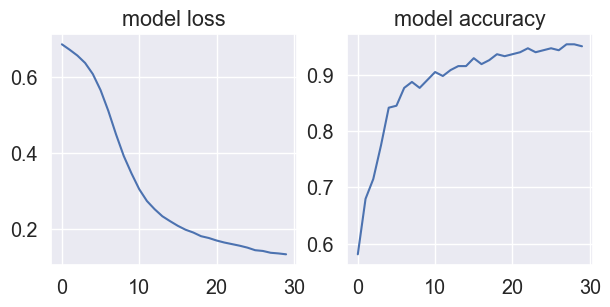

In [151]:
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.plot(tf_model.history["loss"])
plt.title("model loss")
plt.subplot(1, 2, 2)
plt.plot(tf_model.history["accuracy"])
plt.title("model accuracy")

In [152]:
y_pred = model.predict(X_test) > 0.5

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [153]:
y_test2 = y_test.values.reshape(-1, 1)
y_pred.shape
y3 = y_test2 == y_pred
y3.sum() / y3.shape[0]

0.9507042253521126

### 결과
- 30개의 feature을 넣은 모델은 정확도가 94% ~ 97%였고,(random 변수가 고정되어있지 않기 때문에 매번 바뀜) 위에서 고른 8개의 feature를 넣은 모델은 93% ~ 96%로 소폭 하락한 모습을 보이나, 거의 비슷한 성능을 보여 원본보다 훨씬 가볍지만 결과는 비슷한 모델로 구현된 것 같다.
- evaluate 값은 30개를 넣은 버전이 소폭 나은 것으로 보인다. 확실히 파라미터를 많이 들어간 모델이 성능이 더 나은 것을 보여준다.